In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load dataset
thyroid_data = pd.read_csv("/content/thyroid_data.csv")
thyroid_data = thyroid_data.drop(['S.no'], axis=1)

In [ ]:
# Fix age value
thyroid_data.loc[thyroid_data['Age'] == '455', 'Age'] = '45'


In [ ]:
# Drop unnecessary columns
thyroid_data = thyroid_data.drop(['TSH Measured', 'T3 Measured', 'TT4 Measured', 'T4U Measured', 'FTI Measured'], axis=1)


In [ ]:
# Binarize category columns
def convert_category(dataframe, column):
    if column == 'Sex':
        conditionF = dataframe[column] == 'F'
        conditionT = dataframe[column] == 'M'
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

binary_cols = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant',
               'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goitre',
               'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in binary_cols:
    convert_category(thyroid_data, col)


In [ ]:
# Convert '?' to np.nan and convert numeric data to numeric dtype
for col in thyroid_data.columns:
    if col != 'Category':
        thyroid_data.loc[thyroid_data[col] == '?', col] = np.nan
        thyroid_data[col] = pd.to_numeric(thyroid_data[col])

In [ ]:
# Impute missing values using median strategy
curr_columns = thyroid_data.columns.difference(['Category'])
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = imputer.fit_transform(thyroid_data.drop('Category', axis=1))
imputed_data = pd.DataFrame(imputed_data, columns=curr_columns)
thyroid_data = pd.concat([imputed_data.reset_index(), thyroid_data['Category'].reset_index()],
                         axis=1).drop('index', axis=1)

In [ ]:
# Split dataset into training and testing sets
X = thyroid_data.drop('Category', axis=1)
y = thyroid_data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
# Scale features using min-max scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled features back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
# Perform one-hot encoding
num_classes = len(label_encoder.classes_)
y_train_encoded = tf.keras.utils.to_categorical(y_train_encoded, num_classes)

In [ ]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

In [ ]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

In [ ]:
#SVM
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

In [ ]:
#Print evaluation metrics
print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print()
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print()
print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print()
print("KNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Random Forest:
Accuracy: 0.7426356589147287
Precision: 0.7224560108281038
Recall: 0.7426356589147287
F1 Score: 0.7323620529461524

Decision Tree:
Accuracy: 0.7364341085271318
Precision: 0.723364551545126
Recall: 0.7364341085271318
F1 Score: 0.7297953222857706

SVM:
Accuracy: 0.8511627906976744
Precision: 0.7293790010488626
Recall: 0.8511627906976744
F1 Score: 0.7855790580811033

KNN:
Accuracy: 0.8108527131782945
Precision: 0.7442472503809713
Recall: 0.8108527131782945
F1 Score: 0.7737593483554575


In [ ]:
# Update the model's output layer to match the number of classes
num_classes = y_train_encoded.shape[1]
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
81/81 [==============================] - 1s 1ms/step - loss: 0.7455 - accuracy: 0.8544
Epoch 2/10
81/81 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8548
Epoch 3/10
81/81 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.8548
Epoch 4/10
81/81 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.8548
Epoch 5/10
81/81 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.8548
Epoch 6/10
81/81 [==============================] - 0s 1ms/step - loss: 0.5091 - accuracy: 0.8548
Epoch 7/10
81/81 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.8548
Epoch 8/10
81/81 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.8552
Epoch 9/10
81/81 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8556
Epoch 10/10
81/81 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.8556


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
low_risk_measures = "No specific preventive measures recommended at the moment."
high_risk_measures = "Consult with a healthcare professional for personalized preventive measures."


21/21 [==============================] - 0s 1ms/step


In [ ]:
# Assuming 'y_pred' contains the predicted probabilities for each individual

# Set the consultation levels and corresponding recommendations
consult_levels = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]
consult_recommendations = [
    "No specific preventive measures recommended at the moment.",
    "Maintain a healthy lifestyle with balanced diet and regular exercise.",
    "Consider getting regular check-ups and monitoring thyroid health.",
    "Consult with a healthcare professional for further evaluation.",
    "Consult with a doctor for personalized preventive measures.",
    "Immediate consultation with a doctor is advised."
]


In [ ]:
 #Convert predictions to recommendations
recommendations = []

for pred in y_pred:
    max_prob = max(pred)
    max_index = np.argmax(pred)
    for i, level in enumerate(consult_levels):
        if max_prob < level:
            recommendations.append(consult_recommendations[i])
            break


In [ ]:
# Print recommendations for each individual
for i, recommendation in enumerate(recommendations):
    print(f"Recommendation for individual {i+1}: {recommendation}")


Recommendation for individual 1: Consult with a doctor for personalized preventive measures.
Recommendation for individual 2: Consult with a doctor for personalized preventive measures.
Recommendation for individual 3: Consult with a doctor for personalized preventive measures.
Recommendation for individual 4: Consult with a doctor for personalized preventive measures.
Recommendation for individual 5: Immediate consultation with a doctor is advised.
Recommendation for individual 6: Consult with a doctor for personalized preventive measures.
Recommendation for individual 7: Consult with a doctor for personalized preventive measures.
Recommendation for individual 8: Consult with a healthcare professional for further evaluation.
Recommendation for individual 9: Consult with a doctor for personalized preventive measures.
Recommendation for individual 10: Immediate consultation with a doctor is advised.
Recommendation for individual 11: Consult with a doctor for personalized preventive meas

In [ ]:
# Print recommendations for each individual
for i, recommendation in enumerate(recommendations):
    print(f"Recommendation for individual {i+1}: {recommendation}")
age = X_test_scaled['Age'] * 100
risk_probabilities = np.max(y_pred, axis=1) * 100

Recommendation for individual 1: Consult with a doctor for personalized preventive measures.
Recommendation for individual 2: Consult with a doctor for personalized preventive measures.
Recommendation for individual 3: Consult with a doctor for personalized preventive measures.
Recommendation for individual 4: Consult with a doctor for personalized preventive measures.
Recommendation for individual 5: Immediate consultation with a doctor is advised.
Recommendation for individual 6: Consult with a doctor for personalized preventive measures.
Recommendation for individual 7: Consult with a doctor for personalized preventive measures.
Recommendation for individual 8: Consult with a healthcare professional for further evaluation.
Recommendation for individual 9: Consult with a doctor for personalized preventive measures.
Recommendation for individual 10: Immediate consultation with a doctor is advised.
Recommendation for individual 11: Consult with a doctor for personalized preventive meas

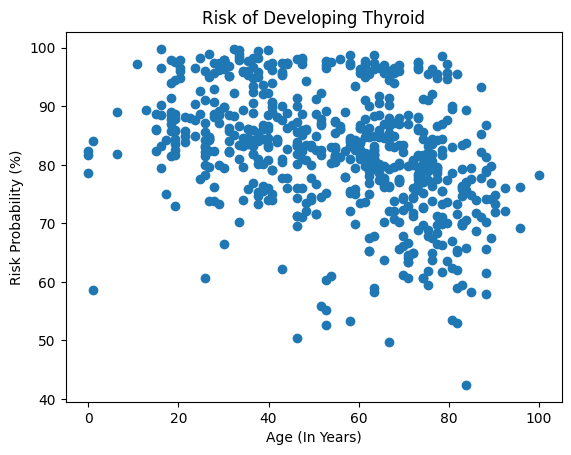

In [ ]:
# Plot scatter plot of risk probabilities and age
plt.scatter(age, risk_probabilities)
plt.xlabel('Age (In Years)')
plt.ylabel('Risk Probability (%)')
plt.title('Risk of Developing Thyroid')
plt.show()


In [ ]:
#Create lists of metrics for plotting
models = ['Random Forest', 'Decision Tree', 'SVM', 'KNN']
accuracy = [rf_accuracy, dt_accuracy, svm_accuracy, knn_accuracy]
precision = [rf_precision, dt_precision, svm_precision, knn_precision]
recall = [rf_recall, dt_recall, svm_recall, knn_recall]

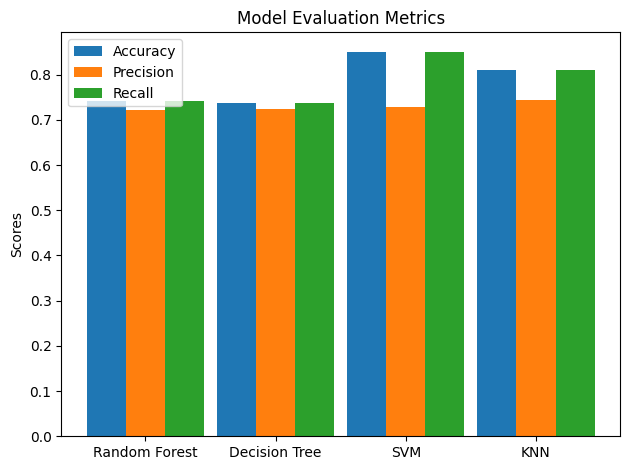

In [ ]:
#Plot graph of result of models
x = np.arange(len(models))
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2 + width, recall, width, label='Recall')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x + width/2)
ax.set_xticklabels(models)
ax.legend()
fig.tight_layout()
plt.show()